# Task 4

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy import sparse 

G = pd.read_pickle('bigger_graph.pickle')
G

Number of nodes: 2767
Number of edges: 229384
Average degree: 165.79978315865557
Is the graph connected? True
Number of connected components: 1


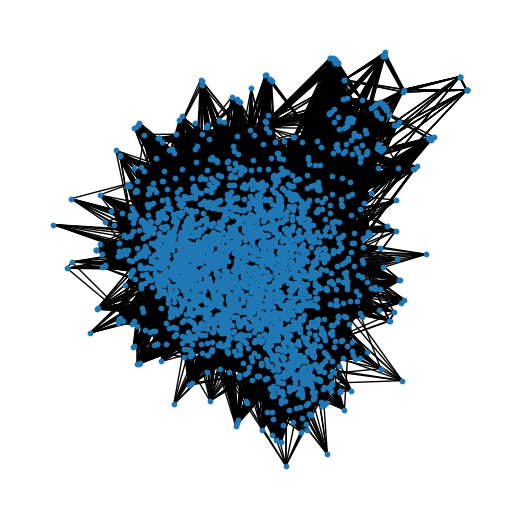

In [2]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
degrees = [G.degree(n) for n in G.nodes()]
print(f"Average degree: {sum(degrees) / len(degrees)}")
print(f"Is the graph connected? {nx.is_connected(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")

plt.figure(figsize=(5, 5)) 
pos = nx.spring_layout(G)
nx.draw(G, pos , with_labels=False, node_size=10)
plt.show()

In [3]:
def recommend_songs_weighted(graph, input_song, num_recommendations=5):
    recommended_songs = []

    if input_song in graph.nodes:
        current_song = input_song
        visited = set([current_song])
        
        while len(recommended_songs) < num_recommendations:
            neighbors = list(graph[current_song])
            neighbor_weights = [(neighbor, graph.edges[current_song, neighbor]['weight']) for neighbor in neighbors if neighbor not in visited]
            
            if not neighbor_weights:
                break
            
            # Sort neighbors by edge weights in descending order
            neighbor_weights.sort(key=lambda x: x[1], reverse=True)
            
            next_song = neighbor_weights[0][0]
            recommended_songs.append((next_song, neighbor_weights[0][1]))
            visited.add(next_song)
            current_song = next_song
        
        return recommended_songs
    else:
        print("Input song not found in the graph.")
        return None


input_song = "spotify:track:6yHkPtl6UQ7RjtJLBPzbJw"  
num_recommendations = 5 
recommended_songs_weighted = recommend_songs_weighted(G, input_song, num_recommendations)
print("Recommended songs:")
for song in recommended_songs_weighted:
    print(song)

Recommended songs:
('spotify:track:0dA2Mk56wEzDgegdC6R17g', 3)
('spotify:track:0CcQNd8CINkwQfe1RDtGV6', 5)
('spotify:track:152lZdxL1OR0ZMW6KquMif', 4)
('spotify:track:3kxfsdsCpFgN412fpnW85Y', 8)
('spotify:track:7hDc8b7IXETo14hHIHdnhd', 6)


In [5]:
SPOTIPY_CLIENT_ID = '2c79005a25ff450fa2c58921fbfe370f'
SPOTIPY_CLIENT_SECRET = 'e6576447735343e28e391f30a16a9204'
SPOTIPY_REDIRECT_URI = 'http://localhost:3000'

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize Spotipy client
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID,
                                               client_secret=SPOTIPY_CLIENT_SECRET,
                                               redirect_uri=SPOTIPY_REDIRECT_URI,
                                               scope="user-library-read"))

# Get the list of node IDs (track IDs) from the graph
node_ids = list(G.nodes())

# Batch size and delay
batch_size = 100
delay = 30  # Delay in seconds

# List to store audio features
audio_features = []

# Iterate over node IDs in batches
for i in range(0, len(node_ids), batch_size):
    batch = node_ids[i:i + batch_size]
    
    # Retrieve audio features for the batch
    features = sp.audio_features(batch)
    audio_features.extend(features)
    
    # Delay for 30 seconds before the next batch
    time.sleep(delay)


# Convert audio features to a DataFrame
audio_features_df = pd.DataFrame(audio_features)

# Separate numerical and non-numerical columns
numerical_cols = audio_features_df.select_dtypes(include=['float64', 'int64']).columns
non_numerical_cols = audio_features_df.select_dtypes(exclude=['float64', 'int64']).columns

# Vectorize only the numerical columns
scaler = MinMaxScaler()
audio_features_scaled = pd.DataFrame(
    scaler.fit_transform(audio_features_df[numerical_cols]),
    columns=numerical_cols,
    index=audio_features_df.index
)

# Combine the scaled numerical columns with the non-numerical columns
audio_features_scaled = pd.concat([audio_features_scaled, audio_features_df[non_numerical_cols]], axis=1)

In [9]:

node_id = 'spotify:track:6yHkPtl6UQ7RjtJLBPzbJw'  # Replace with the actual node ID

# Check if the node exists in the graph
if node_id in G.nodes:
    # Get the audio features of the node
    audio_features = G.nodes[node_id]['audio_features']

    print(f"Audio features for node {node_id}:")
    print(audio_features)
else:
    print(f"Node {node_id} does not exist in the graph.")

KeyError: 'audio_features'